# TP1 Régression lineaire

### Importation des librairies

In [21]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

## III- Régression linéaire multiple avec l'algorithme de descente du gradient

### III-1. Lecture des données 

In [22]:
df = pd.read_csv('./house.txt')

FileNotFoundError: [Errno 2] No such file or directory: './house.txt'

### III-2. Conversion du txt vers csv

In [ ]:
df.to_csv('./house.csv',index=False)
features=['area','bedrooms','floors','age','price']
house = pd.read_csv('./house.csv',names=features)
house.head()

,area,bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


### III-3. extraction des features et du label

In [ ]:
X=house.iloc[:,:4]   # diviser house data en X (features) et y (labels)
y=house.iloc[:,4]

In [ ]:
X.head()

,area,bedrooms,floors,age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0


In [ ]:
y.head()

0    271.5
1    300.0
2    509.8
3    394.0
4    540.0
Name: price, dtype: float64

### III-4. Division du dataset en données d'entrainement et données de test

In [ ]:
X=np.array(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)


### II-5. La prédiction

Soit \$X\$ les données et \$N\$ le nombre de parametres du modèle de régression linéaire. 

On cherche à prédire: \$\$\hat{Y} = \sum\limits\_{j=0}^{N} a_j X_j\$\$ avec \$\$X_0=1\$\$

Le but de l'algorithme de descente du gradient est de trouver les parametres \$a_j\$ qui minimisent la fonction coût
 

In [ ]:
# todo

# Ecrire la fonction prédiction qui estime y_hat
def prediction(X, a):
  """
  Calculate y_hat.
    
  Args:
    X (ndarray (n,)): Data, n examples 
    a : model parameters  
  
  Returns
      y_hat
  """
  return np.dot(X, a)
  return(y_hat)
X_t =np.array([[1., 5.],[1., 10.],[1., 8]])
theta_t = np.array([0.25,0.5])
prediction(X_t,theta_t)
 
      

array([2.75, 5.25, 4.25])

### III-6. La fonction coût

La fonction du coût J est définie comme suit:

\$\$J =  \frac{1}{2n} \sum\limits\_{i=1}^{n}
(Y - \hat{Y})^2\$\$


In [ ]:
# TODO: La fonction coût à minimiser est donnée par la formule suivante:

def J(X, Y, a):
    """
    Calculer J.

    Args:
        X (ndarray): n samples 
        Y (ndarray): n Target labels   
        a  (ndarray): p parameters models

    Returns:
        J
    """
    Y_hat = prediction(X, a)
    J = np.mean((Y - Y_hat)**2) / 2
    return J

# Test de la fonction coût avec des données d'exemple
X_t = np.array([[1., 5.], [1., 10.], [1., 8.]])
theta_t = np.array([0.25, 0.5])
Y_t = np.array([3., 5., 4.5])
cost = J(X_t, Y_t, theta_t)
print(cost)


0.03125


### III-7. Calcul des dérivées partielles

On calcule les dérivées partielles ppur chaque parametre comme suit: 

\$\$\frac{\partial J}{\partial a_j} = \frac{\partial }{\partial a_j} \frac{1}{2n} \sum\limits\_{i=1}^{n} (Y -\hat{Y})^2\$\$
 

\$\$\frac{\partial J}{\partial a_j} = \frac{1}{n} \sum\limits\_{i=1}^{n} -(Y^{(i)} - \hat{Y}^{(i)})X_j^{(i)}\$\$  


In [ ]:



# TODO: écrire la fonction dérivées qui calcule les dérivées partielles par rapport à chaque paramètre du modèle
def derivees_partielles(X, Y, a):
    """
    Calculer dérivées partielles.
    
    Args:
        X (ndarray): Data, n examples 
        Y (ndarray): Label, n labels   
        a          : model parameters  
    
    Returns:
        derivees
    """
    erreur = (Y - prediction(X, a))

    # Calculer les dérivées partielles
    derivees = (1 / len(Y)) * np.dot(X.T, erreur)

    return derivees

# Test de la fonction dérivées avec des données d'exemple
X_t = np.array([[1., 5.], [1., 10.], [1., 8]])
theta_t = np.array([0.25, 0.5])
Y_t = np.array([3., 5., 4.5])
print("résultats:", derivees_partielles(X_t, Y_t, theta_t))

 

résultats: [0.08333333 0.25      ]


### III-8.  l'algorithme de descente de gradient

#### Types des algorithmes de descente de gradient
Il existe 3 types d'algorithmes de descente de gradient

##### 1- Descente de gradient par batch
   Tous les exemples sont pris en considération durant chaque itération. On prend la moyenne du gradient de tous les exemples et on utilise cette moyenne pour la mise à jour des paramètres. 

##### 2- Descente de gradient mini batch
  On utilise un batch constitué d’un nombre réduit de tous les exemples d’où le nom mini batch. Durant chaque itération, on choisit un mini batch, on calcule la moyenne du gradient de ce mini batch et on met à jour les paramètres du modèle . Pour la prochaine itération, on choisit un autre mini batch et ainsi de suite. 

##### 3- Descente de gradient stochastique
  Dans une itération, un exemple est choisi aléatoirement du dataset et le gradient de cet exemple est utilisé pour mettre à jour les paramètres du modèle. Dans la prochaine itération, un autre exemple est choisi et ainsi de suite. 


###  Vous allez implementer dans ce TP l'algorithme de descente de gradient par Batch

In [28]:
import numpy as np

# Supposons que vous ayez déjà défini la fonction de coût J et la fonction derivees_partielles
def J(X, Y, a):
    # Implémentez votre fonction de coût ici
    pass

def derivees_partielles(X, Y, a):
    # Implémentez votre fonction pour calculer les dérivées partielles ici
    pass



# initialisation des parametres
# a est un vecteur contenant les valeurs initiales des paramètres aj 
a = np.zeros(X_train.shape[1] + 1)
# alpha est le learning rate
alpha=0.01
#max_inter est le nombre max des itérations
max_iter=300

# todo 
#lancer l'algorithme de descente du gradient
def gradient_descent(X, Y, a,alpha,max_iter):
    
    """
    MAJ des parametres du modele
    Calcul de Cost 
    Args:
      X (ndarray : Data, n examples 
      Y (ndarray): Label, n labels   
      a          : model parameters  
      alpha: learning rate
      max_iter   : maxumum number of iterations
   
    
    Returns
        new_a, Cost
    """
    Costs = []  # To save the cost

    for _ in range(max_iter):
        # Calculate the cost
        Cost = J(X, Y, a)
        Costs.append(Cost)

        # Calculate the derivatives
        deriv = derivees_partielles(X, Y, a)

        # Update the parameters
        a -= alpha * deriv

    return a, Costs











NameError: name 'X_train' is not defined

In [23]:

y_train = np.array(y_train).reshape(-1, 1)  # Reshaping the target variable
print(X_train.shape,y_train.shape)

NameError: name 'y_train' is not defined

### III-6. régression lineaire multiple avec l'Algorithme de déscente du gradient

In [24]:
XX_train=np.c_[np.ones(X_train.shape[0]),X_train]
print(XX_train.shape)

NameError: name 'X_train' is not defined

In [26]:
#[new_a,Cost]=gradient_descent(XX_train, y_train, a,alpha,1000)

NameError: name 'X_train' is not defined

###  L'algorithme ne marche pas.   Que faut t'il faire?

In [25]:

#todo
Xnorm=(XX_train-XX_train.mean(axis=0))/X_train.std(axis=0)
Xnorm1=np.c_[np.ones(Xnorm.shape[0]),Xnorm]
[new_a,Cost]=gradient_descent(XX_train, y_train, a.reshape(-1, 1),alpha,4000)

NameError: name 'XX_train' is not defined

### Afficher la courbe de la fonction coût en fonction des itérations

In [27]:
pl.plot(Cost)
pl.show()
print ("les parametres du modèle sont:", new_a)
a0=new_a[0](-X_train.mean()/X.std()*new_a)
a1=new_[a1]/X_train.std()
print('normalisées valeurs ',a0,a1)

NameError: name 'Cost' is not defined

###  Est ce que le nombre des itérations est bon? 
###  pourquoi?


In [29]:
# TODO : Tester d'autres valeurs du learning_rate :   0.1,   0.05,  0.01
a1,cost1=gradient_descent(Xnorm1,y_train,a,0.1,300)
a2,cost2=gradient_descent(X_norm1,y_train,a,0.05,300)
a3,cost3=gradient_descent(Xnorm1,y_train,a,0.01,300)
pl.plot(cost1,label="0.1")
pl.plot(cost2,label="0.05")
pl.plot(cost3,label="0.01")
pl.legend()
pl.show()



learning_rates = [0.1, 0.05, 0.01]
num_iterations = 1000

results = []  # To store the results for each learning rate

pl.figure(figsize=(10, 6))

for alpha in learning_rates:
    a_initial = np.zeros(X_train.shape[1] + 1)
    a, costs = gradient_descent(XX_train, y_train, a_initial.reshape(-1, 1), alpha, num_iterations)
    
    # Store the results for each learning rate
    results.append({
        'learning_rate': alpha,
        'final_parameters': a.flatten(),
        'costs': costs
    })
    
    # Plot the cost curve for each learning rate
    pl.plot(range(num_iterations), costs, label=f'Learning Rate: {alpha}')

# todo
# Affichage des courbes des coûts pou chaque learning rate:
pl.xlabel('Iterations')
pl.ylabel('Cost')
pl.title('Cost Curves for Each Learning Rate')
pl.legend()
pl.show()

NameError: name 'gradient_descent' is not defined

In [ ]:
# todo
# tester une initialisation aléatoire, une initialisation à 1 pour le vecteur a en
# fixant le rate learning à 0.01 et le max_iteration à 200
# afficher les courbes des trois initialisations de a 

t,couts1=gradient_descent(Xnorm1,y_train,np.random.rand(Xnorm1.shape[1]),0.1)
t,couts2=gradient_descent(Xnorm1,y_train,np.zeros(Xnorm1.shape[1]),0.1)
t,couts3=gradient_descent(Xnorm1,y_train,np.ones.rand(Xnorm1.shape[1]),0.1)









def initialize_parameters(shape, initialization_type='zero'):
    if initialization_type == 'random':
        return np.random.rand(shape)
    elif initialization_type == 'ones':
        return np.ones(shape)
    else:
        return np.zeros(shape)
    
learning_rate = 0.01
max_iterations = 200

initialization_types = ['random', 'ones', 'zero']
results = []  # To store the results for each initialization type

pl.figure(figsize=(10, 6))

for initialization_type in initialization_types:
    a_initial = initialize_parameters(XX_train.shape[1] + 1, initialization_type)
    a, costs = gradient_descent(XX_train, y_train, a_initial, learning_rate, max_iterations)

    results.append({
        'initialization_type': initialization_type,
        'final_parameters': a.flatten(),
        'costs': costs
    })

    pl.plot(range(max_iterations), costs, label=f'Initialization: {initialization_type}')

pl.xlabel('Iterations')
pl.ylabel('Cost')
pl.title('Cost Curves for Different Parameter Initializations')
pl.legend()
pl.show()


ValueError: shapes (66,5) and (6,) not aligned: 5 (dim 1) != 6 (dim 0)

<Figure size 1000x600 with 0 Axes>

NameError: name 'y_hat' is not defined

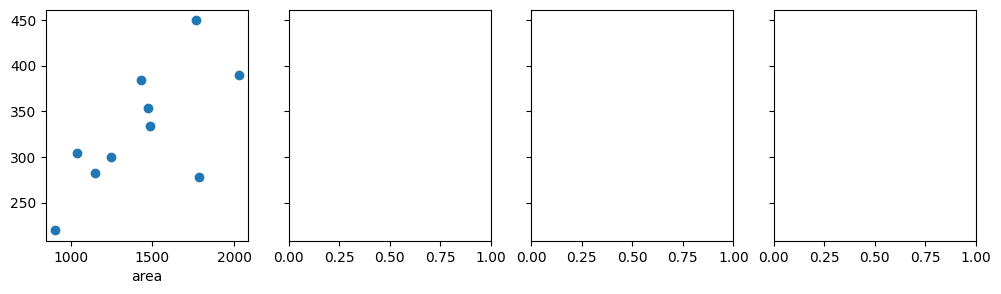

In [ ]:
# plot predictions and targets vs original features    
fig,ax=pl.subplots(1,4,figsize=(12,3),sharey=True)
X_train=np.array(X_train)


for i in range(len(ax)):
     
    ax[i].scatter(X_train[:10,i],y_train[:10], label = 'target')
    ax[i].set_xlabel(features[i])
    ax[i].scatter(X_train[:10,i],y_hat[:10],color='red', label = 'predict')

ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Regression lineaire multiple avec l'algorithme de descente du gradient")
pl.show()

### III-9. régression lineaire multiple avec sklearn et Stochastic Gradient Descent Regressor

### III-9-1 Déterminsation du modèle de regression

In [ ]:
from sklearn.preprocessing import StandardScaler  # normalisation
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter=1000)

sgdr.fit(Xnorm, y_train.ravel())
b = sgdr.intercept_
w = sgdr.coef_
print(f"model paraeters:                   w: {w}, b:{b}")


NameError: name 'Xnorm' is not defined

### III-6-2  Prédiction 

In [ ]:
y_pred=sgdr.predict(Xnorm)
print(f"Prediction sgd regression on training set:\n {sgdr.predict(Xnorm)[:4]}" )
 
print(f"Target values \n {y_train[:4]}")
print(f"source values \n {X_train[:4]}")

Prediction sgd regression on training set:
 [367.70036679 216.75417537 429.1586239  342.01816785]
Target values 
 [[334. ]
 [219.8]
 [449.8]
 [354. ]]
source values 
 [[1.486e+03 3.000e+00 1.000e+00 5.700e+01]
 [9.040e+02 3.000e+00 1.000e+00 5.500e+01]
 [1.768e+03 3.000e+00 2.000e+00 1.800e+01]
 [1.470e+03 3.000e+00 2.000e+00 2.400e+01]]


In [ ]:
# todo
# faire la prédiction sur le test set